In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

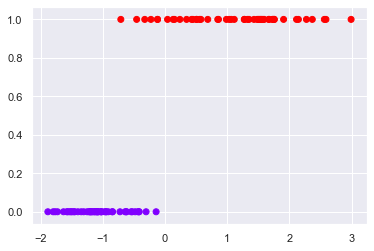

In [93]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
plt.scatter(x, y, c=y, cmap='rainbow')

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [111]:
lr1 = LogisticRegression(C=1)
lr1.fit(x_train, y_train)
lr05 = LogisticRegression(C=0.5)
lr05.fit(x_train, y_train)
lr01 = LogisticRegression(C=0.1)
lr01.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
print(lr.coef_)
print(lr.intercept_)

[[1.74711702]]
[0.38459861]


In [113]:
y_pred1 = lr1.predict(x_test)
print(y_pred1)
y_pred05 = lr05.predict(x_test)
print(y_pred01)
y_pred01 = lr01.predict(x_test)
print(y_pred01)

[1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1]
[1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1]
[1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1]


In [114]:
confusion_matrix(y_test, y_pred)

array([[5, 4],
       [8, 8]], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score, f1_score

In [118]:
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred05))
print(accuracy_score(y_test, y_pred01))

1.0
1.0
0.96


In [119]:
print(f1_score(y_test, y_pred1))
print(f1_score(y_test, y_pred05))
print(f1_score(y_test, y_pred01))

1.0
1.0
0.967741935483871


In [110]:
lr.predict_proba(x_test)

array([[0.04178687, 0.95821313],
       [0.01267286, 0.98732714],
       [0.00736608, 0.99263392],
       [0.63755482, 0.36244518],
       [0.74952577, 0.25047423],
       [0.0306616 , 0.9693384 ],
       [0.93296041, 0.06703959],
       [0.09582152, 0.90417848],
       [0.13167463, 0.86832537],
       [0.45618833, 0.54381167],
       [0.04583088, 0.95416912],
       [0.13403631, 0.86596369],
       [0.00365032, 0.99634968],
       [0.87738373, 0.12261627],
       [0.19904486, 0.80095514],
       [0.83742076, 0.16257924],
       [0.06036333, 0.93963667],
       [0.83050513, 0.16949487],
       [0.59378864, 0.40621136],
       [0.01077374, 0.98922626],
       [0.04869787, 0.95130213],
       [0.10832691, 0.89167309],
       [0.84136707, 0.15863293],
       [0.80388942, 0.19611058],
       [0.24388228, 0.75611772]])

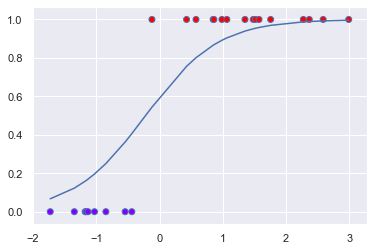

In [109]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')